In [429]:
T[0]=[[np.random.random()+1.3*np.random.random()**0.7+0.4*np.random.random()**1.8+0.4*np.random.random()**4.8 for j in range(inputDim[0])] for i in range(inputDim[0])]

C:\Users\19223\anaconda3\lib\site-packages\ipykernel_launcher.py:64: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


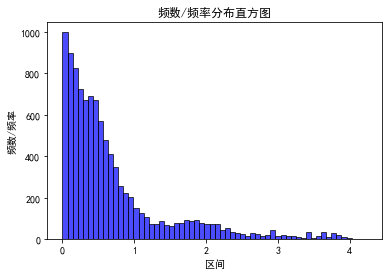

In [716]:
import numpy as np
import quadprog
import time
#模拟数据
m=10
n=m
inputDim=[n,m]    #每层交换机个数,3:最高层个数，6：最底层个数；因为我们的推导是从顶层向底层推，所以我把array倒过来
D=[16*np.random.rand(inputDim[i+1])**(-0.3*(2*np.random.rand(inputDim[i+1]))-1.3)+1*np.random.rand(inputDim[i+1])**(0.3*(2*np.random.rand(inputDim[i+1]))-1.3)+0.4*np.random.rand(inputDim[i+1])**0.08+0.4*np.random.rand(inputDim[i+1])**4.8 for i in range(len(inputDim)-1)] #交换机个数为4、5、6的层的单个交换机延时

structure=[[np.random.randint(0, inputDim[i]-1) for _ in range(inputDim[i+1])] for i in range(len(inputDim)-1)]  
#structure=list(range(n))
#np.random.shuffle(structure)
#structure=[structure]
#structure: [[1, 2, 1, 1], [0, 3, 3, 3, 0], [1, 0, 4, 0, 3, 0]]  
#其中[1, 2, 1, 1]指的是交换机个数为4的层与交换机个数为3的层之间的交换机连接情况；其中的第i个数a[i]表示交换机个数为4的层中第i-1台交换机与换机个数为3的层中第a[i]台交换机相连
T=[np.zeros([inputDim[i],inputDim[i]]) for i in range(len(inputDim))]#各层的同级交换机间通信时间, 最开始展现的是PSW，最后print的是ASW
T[0]=[[np.random.random()+13*np.random.random()**0.007+4*np.random.random()**18+0.4*np.random.random()**4.8 for j in range(inputDim[0])] for i in range(inputDim[0])]
#+1/(np.random.random()+1e-9)
for k in range(1,len(inputDim)):
    for i in range(inputDim[k]):
        for j in range(inputDim[k]):
            T[k][i][j]=(D[k-1][i]+D[k-1][j]+T[k-1][structure[k-1][i]][structure[k-1][j]])
#临时矩阵
TTT=np.zeros([m,m,n,n])
for i in range(m):
    for j in range(m):
        d1=np.ones([n,n])*D[-1][i]
        d2=np.ones([n,n])*D[-1][j]
        t0=np.ones([n,n])*T[-1][i][j]
        TTT[i][j]=abs(np.array(T[0])+d1+d2-t0)

#T'矩阵
TT=np.zeros([m*n,m*n])
for i in range(m):
    for j in range(m):
        for i1,k in enumerate(range((i*n),((i+1)*n),1)):
            for i2,l in enumerate(range((j*n),((j+1)*n),1)):
                TT[k][l]=TTT[i][j][i1][i2]
                
L=np.zeros(m*n)
for i in range(m):
    L[(i*n)+structure[-1][i]]=1
L2=np.zeros(m*n)
for i in range(m):
    L2[structure[-1][i]*m+i]=1
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

# 设置matplotlib正常显示中文和负号
matplotlib.rcParams['font.sans-serif']=['SimHei']   # 用黑体显示中文
matplotlib.rcParams['axes.unicode_minus']=False     # 正常显示负号
# 随机生成（10000,）服从正态分布的数据
data = np.random.randn(10000)
"""
绘制直方图
data:必选参数，绘图数据
bins:直方图的长条形数目，可选项，默认为10
normed:是否将得到的直方图向量归一化，可选项，默认为0，代表不归一化，显示频数。normed=1，表示归一化，显示频率。
facecolor:长条形的颜色
edgecolor:长条形边框的颜色
alpha:透明度
"""
plt.hist(TT.reshape(m*m*n*n), bins=60, normed=0, facecolor="blue", edgecolor="black", alpha=0.7)
# 显示横轴标签
plt.xlabel("区间")
# 显示纵轴标签
plt.ylabel("频数/频率")
# 显示图标题
plt.title("频数/频率分布直方图")
plt.show()

0 -------------------------------------------------------------------------------------------------------------------------------------
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0.]
2 -------------------------------------------------------------------------------------------------------------------------------------
time 3.612370014190674
0.0
[[0 0 0 0 0 0 0 0 0 0]]


C:\Users\19223\anaconda3\lib\site-packages\ipykernel_launcher.py:76: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


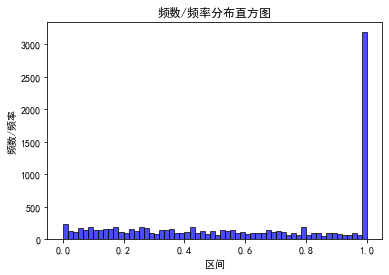

In [717]:
TT=np.clip(TT,0,TT.mean())
TT=(TT)/(TT.max())
def target(y):    #target of argmin
    return y.T.dot(TT).dot(y)+(QList+gList).T.dot(g(y))+alpha*(np.linalg.norm(y-x))**2   
bnds = [(0, 1)]*(m*n)  # 定义域
alpha=1
beta=1
max_iter=10000
eps=4e-3   #可能要调，影响精度
def g1(x,i,j):
    return beta*x[i*n+j]*(x[i*n+j]-1)
def g2(x,i):
    return beta*sum(x[(i*n):(i*n+n)])-1 
def g(x):
    res=[]
    for i in range(m):
        for j in range(n):
            res.append(g1(x,i,j))
    for i in range(m):
        res.append(g2(x,i))
    for i in range(m):
        for j in range(n):
            res.append(-g1(x,i,j))
    for i in range(m):
        res.append(-g2(x,i))
    return np.array(res)


x,x_bar=np.random.random([m*n]),np.zeros([m*n])
x_new=x.copy()
gList=g(x)
QList=[max(0,-i) for i in gList]#[max(0,-i) for i in gList]
ycurrent=np.zeros(m*n)


start=time.time()
for t in range(max_iter):
    if t%2==0:
        print(t,'-------------------------------------------------------------------------------------------------------------------------------------')


    x_new=opt.minimize(target,x0=np.random.random(m*n),bounds=bnds).x
    if np.linalg.norm(x-x_new)<eps:
        break
    x=x_new.copy()
    print(x)
    gList=g(x)
    QList=[max(-gList[i],QList[i]+gList[i]) for i in range(len(gList))]
    x_bar=x_bar*t/(t+1)+x/(t+1)
    
print('time',time.time()-start)
#发现：new_TT主对角线元素整体尽可能小，则收敛更快；学习率epsilon尽可能小，则精度越高且速度并不很慢（我没做几轮实验，这个说法不大科学）
print(sum(abs(x-L)))
xx=x.reshape([m,n])
a=np.array([np.argmax(xx[i]) for i in range(m)])
print(a-structure)   #理想情况应该每个元素都是0

import matplotlib.pyplot as plt
import numpy as np
import matplotlib

# 设置matplotlib正常显示中文和负号
matplotlib.rcParams['font.sans-serif']=['SimHei']   # 用黑体显示中文
matplotlib.rcParams['axes.unicode_minus']=False     # 正常显示负号
# 随机生成（10000,）服从正态分布的数据
data = np.random.randn(10000)
"""
绘制直方图
data:必选参数，绘图数据
bins:直方图的长条形数目，可选项，默认为10
normed:是否将得到的直方图向量归一化，可选项，默认为0，代表不归一化，显示频数。normed=1，表示归一化，显示频率。
facecolor:长条形的颜色
edgecolor:长条形边框的颜色
alpha:透明度
"""
plt.hist(TT.reshape(m*m*n*n), bins=60, normed=0, facecolor="blue", edgecolor="black", alpha=0.7)
# 显示横轴标签
plt.xlabel("区间")
# 显示纵轴标签
plt.ylabel("频数/频率")
# 显示图标题
plt.title("频数/频率分布直方图")
plt.show()

In [718]:
TT[0]

array([0.2130168 , 0.46352387, 0.08079773, 1.        , 0.16211939,
       0.11636712, 0.39413912, 0.33872545, 0.33003646, 0.7149033 ,
       1.        , 0.95971841, 1.        , 0.38731043, 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.70833898,
       0.890693  , 0.64018592, 1.        , 0.06777795, 1.        ,
       1.        , 0.70957068, 0.76498435, 0.77367334, 0.38880649,
       1.        , 0.95971841, 1.        , 0.38731043, 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.70833898,
       1.        , 0.95971841, 1.        , 0.38731043, 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.70833898,
       0.7362105 , 0.48570342, 1.        , 0.08670455, 1.        ,
       1.        , 0.55508818, 0.61050185, 0.61919084, 0.23432399,
       0.09582205, 0.15468503, 0.38963658, 0.727093  , 0.47095823,
       0.42520597, 0.08530027, 0.02988661, 0.02119762, 0.40606446,
       0.890693  , 0.64018592, 1.        , 0.06777795, 1.     

In [674]:
x

array([4.21597190e-01, 1.94660353e-01, 5.16873854e-01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.61739179e-02, 4.18911601e-01,
       4.86104050e-01, 0.00000000e+00, 8.47681676e-01, 0.00000000e+00,
       1.97523309e-01, 7.15104051e-01, 9.87695418e-02, 0.00000000e+00,
       4.75283497e-01, 1.69600997e-02, 6.39766396e-01, 7.49340968e-01,
       1.99751066e-01, 0.00000000e+00, 0.00000000e+00, 7.06276733e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.96922230e-01, 1.09378413e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [564]:
def target(y):    #target of argmin
    return y.T.dot(TT).dot(y)+(QList+gList).T.dot(g(y))+alpha*(np.linalg.norm(y-x))**2   
bnds = [(0, 1)]*(m*n)  # 定义域
alpha= TT.mean()**2/2
max_iter=10000
eps=1e-2   #可能要调，影响精度
def g1(x,i,j):
    return  TT.mean()*x[i*n+j]*(x[i*n+j]-1)
def g2(x,i):
    return  TT.mean()*(sum(x[(i*n):(i*n+n)])-1)
def g(x):
    res=[]
    for i in range(m):
        for j in range(n):
            res.append(g1(x,i,j))
    for i in range(m):
        res.append(g2(x,i))
    for i in range(m):
        for j in range(n):
            res.append(-g1(x,i,j))
    for i in range(m):
        res.append(-g2(x,i))
    return np.array(res)


x,x_bar=np.random.random([m*n]),np.zeros([m*n])
x_new=x.copy()
gList=g(x)
QList=[max(0,-i) for i in gList]#[max(0,-i) for i in gList]
ycurrent=np.zeros(m*n)


start=time.time()
for t in range(max_iter):
    if t%2==0:
        print(t)

    #构造和要argmin的函数等价的二次项和一次项系数：new_TT和linear
    dia=np.array(QList[:m*n])+np.array(gList[:m*n])-(np.array(QList)[(m*n+m):(2*m*n+m)]+np.array(gList)[(m*n+m):(2*m*n+m)])+alpha*np.ones(m*n)
    new_TT=TT+np.diag(dia)
    epsilon=1/max(max(new_TT.sum(axis=0)),max(new_TT.sum(axis=1)))    #可能要调，影响迭代次数和精度
    #print('---',epsilon)
    
    tmp1=np.array(QList)[(m*n):(m*n+m)]+np.array(gList)[(m*n):(m*n+m)]
    tmp2=np.array([[i]*n for i in tmp1]).reshape(m*n)
    tmp3=np.array(QList)[-m:]+np.array(gList)[-m:]
    tmp4=np.array([[i]*n for i in tmp3]).reshape(m*n)
    linear=-(np.array(QList)[:m*n]+np.array(gList)[:m*n])+tmp2+np.array(QList)[(m*n+m):(2*m*n+m)]+np.array(gList)[(m*n+m):(2*m*n+m)]-tmp4-2*alpha*x


    #求解目标是x_k1
    x_k=x.copy()
    x_k1=np.clip(x-epsilon*(2*new_TT.dot(x)+linear),0,1)
    while np.linalg.norm(x_k-x_k1)>eps:
        x_k=x_k1.copy()
        x_k1=np.clip(x_k-epsilon*(2*new_TT.dot(x_k)+linear),0,1)
        print(np.linalg.norm(x_k-x_k1))



    x_new=x_k1.copy()
    if np.linalg.norm(x-x_new)<eps:
        break
    x=x_new.copy()
    gList=g(x)
    QList=[max(-gList[i],QList[i]+gList[i]) for i in range(len(gList))]
    x_bar=x_bar*t/(t+1)+x/(t+1)
    
print('time',time.time()-start)
#发现：new_TT主对角线元素整体尽可能小，则收敛更快；学习率epsilon尽可能小，则精度越高且速度并不很慢（我没做几轮实验，这个说法不大科学）
print(sum(abs(x-L)))
xx=x.reshape([m,n])
a=np.array([np.argmax(xx[i]) for i in range(m)])
print(a-structure)   #理想情况应该每个元素都是0
      

0
0.1537754947589864
0.14034954026694468
0.11386761170458977
0.11265053880779201
0.11264883198186271
0.11264830976747231
0.10478191116566188
0.103043932897313
0.10304618275385152
0.10304969321496002
0.09859707052871987
0.09664830556324383
0.09131644817369923
0.09133697933092709
0.0841157880402541
0.07763179398038433
0.07601370904517567
0.07000253075575562
0.0699178963770541
0.06983389989506558
0.0697505382431998
0.06199091256586759
0.06135628572086143
0.055442244758175524
0.05207194160106445
0.0451761444195565
0.04130562527627702
0.04116099361173969
0.04101693686651713
0.02901439034493732
0.028320096044160165
0.021338845722495697
0.0
0.28343127155905834
0.236324214246889
0.22410035903580644
0.21918189686782028
0.21628882693959203
0.21549134311251417
0.21603182337626237
0.21665709423991233
0.21674326284706175
0.2168539423906817
0.21761837441137744
0.21723794797694343
0.2159051760950853
0.2140428261375528
0.21289145711060536
0.20654424781799102
0.10049278043412886
0.1024114292196334
0.10

In [113]:
TT

array([[6254.7403286 , 7366.28015295, 8417.71881067, ..., 5349.85671627,
        4759.94361416, 6566.30925133],
       [5613.51987734, 3148.028911  , 4009.11253497, ..., 2681.83567182,
        1511.3815286 ,  147.80714144],
       [2951.52838012, 2809.76284867, 7957.97094314, ..., 5936.16506254,
        6721.83692884, 2034.38925267],
       ...,
       [5986.65173835, 2807.86819972, 7344.04748189, ..., 3626.59795275,
        4011.91431016, 1958.92142132],
       [6336.30824807, 8798.97502918, 2429.6216029 , ..., 4047.16686363,
        2090.92871472, 4808.98967403],
       [5318.24450169, 8255.57167781, 5733.78726663, ..., 1068.73819514,
         991.68299782, 3080.2734588 ]])

C:\Users\19223\anaconda3\lib\site-packages\ipykernel_launcher.py:41: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


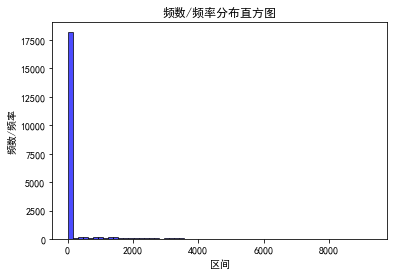

In [709]:
with open(r'C:\Users\19223\Downloads\Chr12a.dat','r',encoding='utf-8') as f:
    lines = f.readlines()
m=int((lines[0]).split()[0])
n=m
A=lines[2:(2+m)]
A=np.array([i.split() for i in A])
B=lines[(3+m):(3+2*m)]
B=np.array([np.array(i.split()).astype('float64') for i in B])
A=np.array([int(i) for i in A.reshape([m*n])]).reshape([m,n])
B=np.array([int(i) for i in B.reshape([m*n])]).reshape([m,n])
#A=A/(A.mean())
#B= B/(B.mean())
structure=np.array([7,5,12,2,1,3,9,11,10,6,8,4])-1
#TT=np.kron(A,B)
TT=np.kron(A,B)
#TT=(TT-TT.mean())/(TT.max()-TT.min())+0.5
L=np.zeros(m*n)
for i in range(m):
    L[(i*n)+structure[i]]=1
L1=L.reshape([m,n])


import matplotlib.pyplot as plt
import numpy as np
import matplotlib

# 设置matplotlib正常显示中文和负号
matplotlib.rcParams['font.sans-serif']=['SimHei']   # 用黑体显示中文
matplotlib.rcParams['axes.unicode_minus']=False     # 正常显示负号
# 随机生成（10000,）服从正态分布的数据
data = np.random.randn(10000)
"""
绘制直方图
data:必选参数，绘图数据
bins:直方图的长条形数目，可选项，默认为10
normed:是否将得到的直方图向量归一化，可选项，默认为0，代表不归一化，显示频数。normed=1，表示归一化，显示频率。
facecolor:长条形的颜色
edgecolor:长条形边框的颜色
alpha:透明度
"""
plt.hist(TT.reshape(m*m*n*n), bins=60, normed=0, facecolor="blue", edgecolor="black", alpha=0.7)
# 显示横轴标签
plt.xlabel("区间")
# 显示纵轴标签
plt.ylabel("频数/频率")
# 显示图标题
plt.title("频数/频率分布直方图")
plt.show()

0 -------------------------------------------------------------------------------------------------------------------------------------
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  0.00000000e+00  0.00000000e+00  0

C:\Users\19223\anaconda3\lib\site-packages\ipykernel_launcher.py:76: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


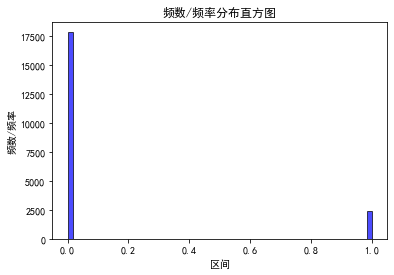

In [712]:
TT=np.clip(TT,0,TT.mean())
TT=(TT)/(TT.max())
def target(y):    #target of argmin
    return y.T.dot(TT).dot(y)+(QList+gList).T.dot(g(y))+alpha*(np.linalg.norm(y-x))**2   
bnds = [(0, 1)]*(m*n)  # 定义域
alpha=1
beta=1
max_iter=10000
eps=4e-3   #可能要调，影响精度
def g1(x,i,j):
    return beta*x[i*n+j]*(x[i*n+j]-1)
def g2(x,i):
    return beta*sum(x[(i*n):(i*n+n)])-1 
def g(x):
    res=[]
    for i in range(m):
        for j in range(n):
            res.append(g1(x,i,j))
    for i in range(m):
        res.append(g2(x,i))
    for i in range(m):
        for j in range(n):
            res.append(-g1(x,i,j))
    for i in range(m):
        res.append(-g2(x,i))
    return np.array(res)


x,x_bar=np.random.random([m*n]),np.zeros([m*n])
x_new=x.copy()
gList=g(x)
QList=[max(0,-i) for i in gList]#[max(0,-i) for i in gList]
ycurrent=np.zeros(m*n)


start=time.time()
for t in range(max_iter):
    if t%2==0:
        print(t,'-------------------------------------------------------------------------------------------------------------------------------------')


    x_new=opt.minimize(target,x0=np.random.random(m*n),bounds=bnds).x
    if np.linalg.norm(x-x_new)<eps:
        break
    x=x_new.copy()
    print(x)
    gList=g(x)
    QList=[max(-gList[i],QList[i]+gList[i]) for i in range(len(gList))]
    x_bar=x_bar*t/(t+1)+x/(t+1)
    
print('time',time.time()-start)
#发现：new_TT主对角线元素整体尽可能小，则收敛更快；学习率epsilon尽可能小，则精度越高且速度并不很慢（我没做几轮实验，这个说法不大科学）
print(sum(abs(x-L)))
xx=x.reshape([m,n])
a=np.array([np.argmax(xx[i]) for i in range(m)])
print(a-structure)   #理想情况应该每个元素都是0

import matplotlib.pyplot as plt
import numpy as np
import matplotlib

# 设置matplotlib正常显示中文和负号
matplotlib.rcParams['font.sans-serif']=['SimHei']   # 用黑体显示中文
matplotlib.rcParams['axes.unicode_minus']=False     # 正常显示负号
# 随机生成（10000,）服从正态分布的数据
data = np.random.randn(10000)
"""
绘制直方图
data:必选参数，绘图数据
bins:直方图的长条形数目，可选项，默认为10
normed:是否将得到的直方图向量归一化，可选项，默认为0，代表不归一化，显示频数。normed=1，表示归一化，显示频率。
facecolor:长条形的颜色
edgecolor:长条形边框的颜色
alpha:透明度
"""
plt.hist(TT.reshape(m*m*n*n), bins=60, normed=0, facecolor="blue", edgecolor="black", alpha=0.7)
# 显示横轴标签
plt.xlabel("区间")
# 显示纵轴标签
plt.ylabel("频数/频率")
# 显示图标题
plt.title("频数/频率分布直方图")
plt.show()

In [714]:
TT[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.        ,
       1.        , 1.        , 0.90520055, 1.        , 1.        ,
       0.31333865, 1.        , 1.        , 0.5918619 , 1.        ,
       1.        , 0.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.7206789 , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [614]:
TT[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 0., 0.

In [612]:
x.T.dot(TT).dot(x)

0.0

C:\Users\19223\anaconda3\lib\site-packages\ipykernel_launcher.py:19: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


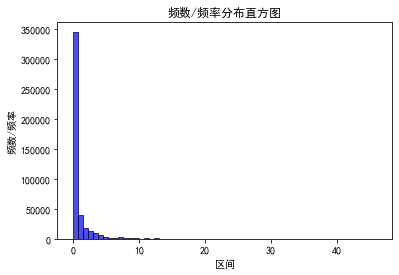

In [407]:
QList

[0.04988864646816333,
 0.03906869744720101,
 0.09723817580947533,
 0.08318587490902965,
 0.06106144276155545,
 0.0799108400793779,
 0.02673225848938222,
 0.010366250178873096,
 0.0524006281146906,
 0.036354883716804405,
 0.06882028635660568,
 0.09279315198214617,
 0.1123870180567106,
 0.1184853298748647,
 0.032619266652524334,
 0.07789053398494901,
 0.03624228957145211,
 0.09783428382343333,
 0.12378664102307382,
 0.12110133024717992,
 0.05635124774900535,
 0.040025846772739314,
 0.03960878103495552,
 0.08758213576791296,
 0.03400473098367982,
 0.07650310717490508,
 0.0746141313759445,
 0.0974357312356482,
 0.06103871321129315,
 0.09346417738411802,
 0.12480120088154599,
 0.08002466613231572,
 0.09997555039234311,
 0.09921440188732314,
 0.040541190554605096,
 0.0672734201084452,
 0.09377793827687272,
 0.05490446251162734,
 0.04990024261000067,
 0.12110377161555573,
 0.10757446514869098,
 0.09778659221709933,
 0.07414602119841199,
 0.06752824768656443,
 0.07833851550654677,
 0.039300910

(-9.559733023043078+0j)

In [ ]:
x_sum=[]
acc=[]
for para1 in [100,1000,1000,10000]:
    for para2 in [1,10,100,1000,10000]:
        def target(y):    #target of argmin
            return y.T.dot(TT).dot(y)+(QList+gList).T.dot(g(y))+alpha*(np.linalg.norm(y-x))**2   
        bnds = [(0, 1)]*(m*n)  # 定义域
        alpha=1.02*TT.mean()**2/2
        max_iter=10000
        eps=1e-2   #可能要调，影响精度
        def g1(x,i,j):
            return  para1*x[i*n+j]*(x[i*n+j]-1)
        def g2(x,i):
            return  para2*(sum(x[(i*n):(i*n+n)])-1)
        def g(x):
            res=[]
            for i in range(m):
                for j in range(n):
                    res.append(g1(x,i,j))
            for i in range(m):
                res.append(g2(x,i))
            for i in range(m):
                for j in range(n):
                    res.append(-g1(x,i,j))
            for i in range(m):
                res.append(-g2(x,i))
            return np.array(res)


        x,x_bar=np.random.random([m*n]),np.zeros([m*n])
        x_new=x.copy()
        gList=g(x)
        QList=[max(0,-i) for i in gList]#[max(0,-i) for i in gList]
        ycurrent=np.zeros(m*n)


        start=time.time()
        for t in range(max_iter):
            if t%2==0:
                print(t)

            #构造和要argmin的函数等价的二次项和一次项系数：new_TT和linear
            dia=np.array(QList[:m*n])+np.array(gList[:m*n])-(np.array(QList)[(m*n+m):(2*m*n+m)]+np.array(gList)[(m*n+m):(2*m*n+m)])+alpha*np.ones(m*n)
            new_TT=TT+np.diag(dia)
            epsilon=1/max(max(new_TT.sum(axis=0)),max(new_TT.sum(axis=1)))    #可能要调，影响迭代次数和精度
            #print('---',epsilon)

            tmp1=np.array(QList)[(m*n):(m*n+m)]+np.array(gList)[(m*n):(m*n+m)]
            tmp2=np.array([[i]*n for i in tmp1]).reshape(m*n)
            tmp3=np.array(QList)[-m:]+np.array(gList)[-m:]
            tmp4=np.array([[i]*n for i in tmp3]).reshape(m*n)
            linear=-(np.array(QList)[:m*n]+np.array(gList)[:m*n])+tmp2+np.array(QList)[(m*n+m):(2*m*n+m)]+np.array(gList)[(m*n+m):(2*m*n+m)]-tmp4-2*alpha*x


            #求解目标是x_k1
            x_k=x.copy()
            x_k1=np.clip(x-epsilon*(2*new_TT.dot(x)+linear),0,1)
            while np.linalg.norm(x_k-x_k1)>eps:
                x_k=x_k1.copy()
                x_k1=np.clip(x_k-epsilon*(2*new_TT.dot(x_k)+linear),0,1)



            x_new=x_k1.copy()
            if np.linalg.norm(x-x_new)<eps:
                break
            x=x_new.copy()
            gList=g(x)
            QList=[max(-gList[i],QList[i]+gList[i]) for i in range(len(gList))]
            x_bar=x_bar*t/(t+1)+x/(t+1)

        #发现：new_TT主对角线元素整体尽可能小，则收敛更快；学习率epsilon尽可能小，则精度越高且速度并不很慢（我没做几轮实验，这个说法不大科学）
        x_sum.append(x.sum())
        xx=x.reshape([m,n])
        a=np.array([np.argmax(xx[i]) for i in range(m)])
        acc.append(sum((a-structure)==0))

C:\Users\19223\anaconda3\lib\site-packages\ipykernel_launcher.py:19: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


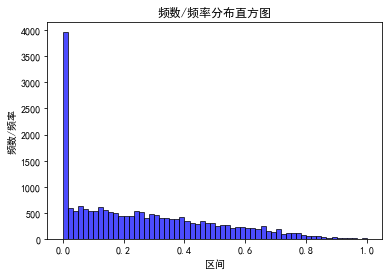